# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
boston = pd.read_csv("BostonHousing.csv")

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### A base não possui valores missing nem strings, e por isso já pode ser manipulada no sklearn

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [6]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


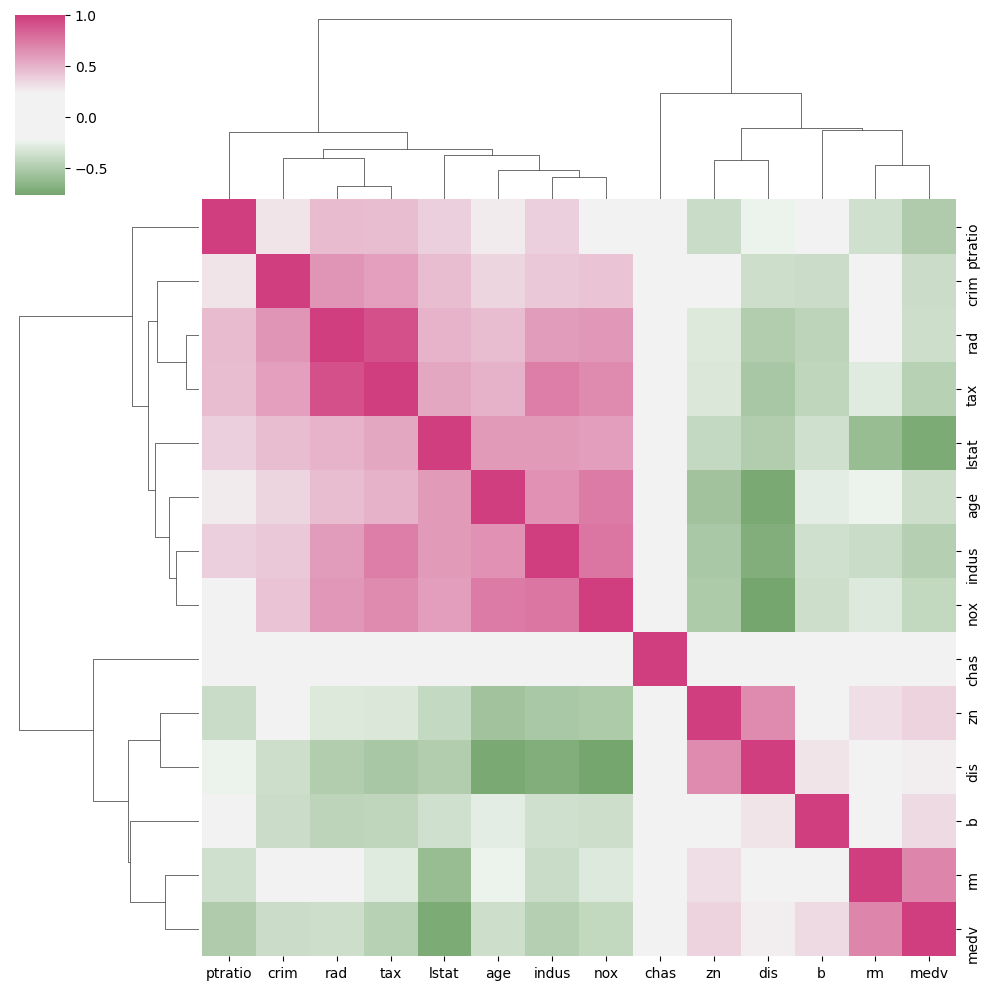

In [7]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(boston.corr(), figsize=(10, 10), center = 0, cmap=cmap)

### Variáveis com mais probabilidade de prever ``medv``
Considerando que as variáveis que possuem maior coerrelação estão mais próximas de 1 ou -1. Após a analise da matriz de correlação e do clustermap chegamos nas variáveis ``rm`` e ``lstat``, sendo ``lstat`` mais significativa

### 3. Separe os dados em validação e teste

In [8]:
X = boston[["lstat", "rm"]]

In [9]:
y = boston["medv"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, train_size=0.3)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
reg1 = DecisionTreeRegressor(max_depth=8)
reg2 = DecisionTreeRegressor(max_depth=2)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

 #### Árvore com ``max_depth = 8``

In [12]:
y8_pred = reg1.predict(X_train)

 #### Árvore com ``max_depth = 2``

In [13]:
y2_pred = reg2.predict(X_train)

In [14]:
tree_depth8 = pd.DataFrame({"y_pred": y8_pred,
                           "y_train": y_train,
                           })

tree_depth2 = pd.DataFrame({"y_pred": y2_pred,
                           "y_train": y_train,
                           })

In [15]:
tree_depth8.reset_index(drop=True, inplace=True)
tree_depth2.reset_index(drop=True, inplace=True)

In [16]:
tree_depth8.head()

,y_pred,y_train
0,18.420000,19.8
1,11.533333,13.3
2,20.720000,23.3
3,21.306667,23.0
4,13.000000,13.0


In [17]:
tree_depth2.head()

,y_pred,y_train
0,19.864706,19.8
1,13.645238,13.3
2,19.864706,23.3
3,19.864706,23.0
4,13.645238,13.0


Text(0.5, 1.0, 'Árvore com  2 de profundidade')

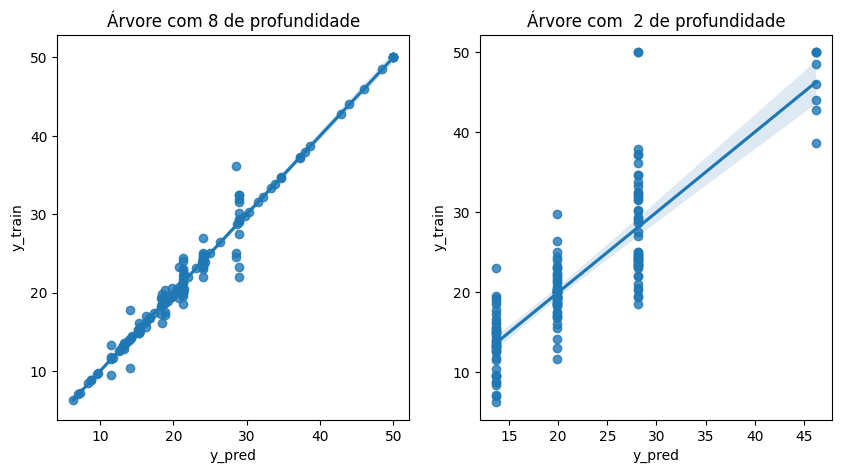

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.regplot(ax = axes[0], x="y_pred", y="y_train", data=tree_depth8)
axes[0].set_title("Árvore com 8 de profundidade")
sns.regplot(ax = axes[1], x="y_pred", y="y_train", data=tree_depth2)
axes[1].set_title("Árvore com  2 de profundidade")

 ####  MSE Árvore com ``max_depth = 8``

In [19]:
mse8 = mean_squared_error(y_true=tree_depth8["y_train"], y_pred=tree_depth8["y_pred"])
mse8

2.244815830968149

 #### MSE Árvore com ``max_depth = 2``

In [20]:
mse2 = mean_squared_error(y_true=tree_depth2["y_train"], y_pred=tree_depth2["y_pred"])
mse2

23.128326610644258

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

<Axes: >

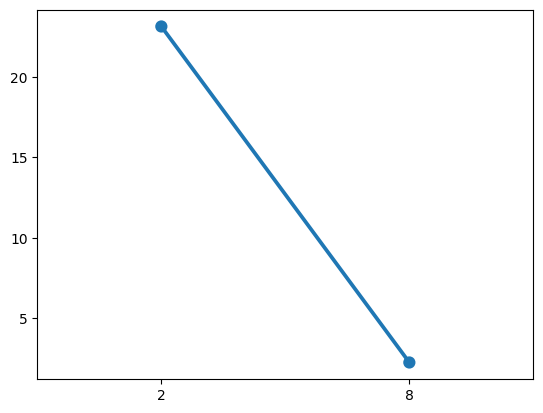

In [21]:
sns.pointplot(x=[2, 8] ,y=[mse2, mse8])

### Resposta

Sem duvidas a árvore com 8 de max_depht, pois possui um erro quadrático médio bem menor

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [29]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(reg1, out_file=None, 
                                feature_names=boston[["rm", "lstat"]].columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render()

'Source.gv.png'

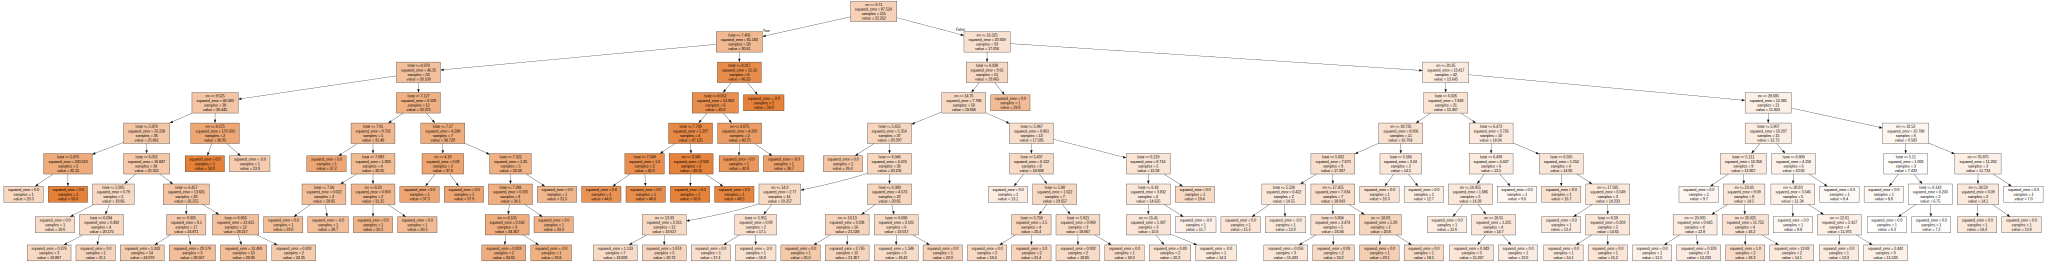

In [32]:
graph

In [ ]:
Não entendi muito 